In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import pandas as pd

%matplotlib inline

In [2]:
df=pd.read_csv("tsa_claims_ujian.csv")

In [3]:
tsa=df.copy()
tsa.head()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
0,0909816M,7-Feb-02,1/6/2003 0:00,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),$50.00,Approved,$50.00,Approve in Full
1,14268,20-Jun-02,6/16/2002 0:00,PHX,Phoenix Sky Harbor International,NaN,Property Damage,Checkpoint,Computer - Laptop,$2;270.09,Canceled,NaN,NaN
2,15242,12-Jul-02,5/31/2002 0:00,BWI,Baltimore/Washington Intl Thurgood Marshall,American Airlines,NaN,Other,Luggage (all types including footlockers),$200.00,Denied,$0.00,Deny
3,16759,21-Aug-02,7/12/2002 0:00,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Passenger Property Loss,Checkpoint,Other,$21.44,Approved,$21.00,Approve in Full
4,17846,9-Sep-02,8/30/2002 0:00,BOS,Boston (Logan) International Airport,NaN,Property Damage,Checkpoint,Luggage (all types including footlockers),$1;832.22,Canceled,$0.00,NaN


In [4]:
tsa.iloc[51061:51066]

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
51061,2015110926685,22-Oct-15,19-Oct-15,-,-,-,Property Damage,Checked Baggage,Baggage/Cases/Purses,-,-,NaN,NaN
51062,2015110226479,2-Nov-15,2-Nov-15,-,-,-,Passenger Property Loss,Checkpoint,Books; Magazines & Other,-,-,NaN,NaN
51063,2015120727336,16-Nov-15,14-Sep-15,-,-,American Airlines,Passenger Property Loss,Checked Baggage,Cosmetics & Grooming,-,-,NaN,NaN
51064,2015120427297,20-Nov-15,16-Oct-15,-,-,-,Property Damage,Checked Baggage,Baggage/Cases/Purses; Books; Magazines & Other...,-,-,NaN,NaN
51065,2016010428072,22-Dec-15,20-Dec-15,-,-,-,Passenger Property Loss,Checked Baggage,Clothing,-,-,NaN,NaN


In [5]:
tsa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51066 entries, 0 to 51065
Data columns (total 13 columns):
Claim Number     51066 non-null object
Date Received    50996 non-null object
Incident Date    50496 non-null object
Airport Code     49014 non-null object
Airport Name     49014 non-null object
Airline Name     42511 non-null object
Claim Type       49106 non-null object
Claim Site       50876 non-null object
Item             50054 non-null object
Claim Amount     50074 non-null object
Status           51065 non-null object
Close Amount     33786 non-null object
Disposition      32846 non-null object
dtypes: object(13)
memory usage: 5.1+ MB


In [6]:
tsa.describe()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
count,51066,50996,50496,49014,49014,42511,49106,50876,50054,50074,51065,33786,32846
unique,51065,3522,10788,405,419,243,8,6,1854,13248,13,6009,3
top,2013121110011,27-May-04,12/22/2004 0:00,LAX,John F. Kennedy International,American Airlines,Passenger Property Loss,Checked Baggage,Other,$0.00,Denied,$0.00,Deny
freq,2,182,43,2379,2286,4377,29713,39937,9183,7065,17134,17907,17147


In [7]:
tsaDesc = []
for i in tsa.columns:
    tsaDesc.append([i, 
                      tsa[i].dtypes, 
                      tsa[i].isna().sum(), 
                      round((((tsa[i].isna().sum())/(len(tsa)))*100),2), 
                      tsa[i].nunique(),
                      tsa[i].drop_duplicates().sample(2).values])
    
pd.DataFrame(tsaDesc, columns = ['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'])

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,Claim Number,object,0,0.00,51065,"[2013022802223, 2013102207540]"
1,Date Received,object,70,0.14,3522,"[18-Mar-11, 2-Sep-14]"
2,Incident Date,object,570,1.12,10788,"[12/23/2010 19:30, 8/3/2010 0:00]"
3,Airport Code,object,2052,4.02,405,"[LIT, AUG]"
4,Airport Name,object,2052,4.02,419,"[Niagara Falls International, Pellston Regiona..."
5,Airline Name,object,8555,16.75,243,"[Direct Air, North American Airlines]"
6,Claim Type,object,1960,3.84,8,"[Property Damage, -]"
7,Claim Site,object,190,0.37,6,"[Other, -]"
8,Item,object,1012,1.98,1854,"[Binoculars; Cameras - Digital, Jewelry & Watc..."
9,Claim Amount,object,992,1.94,13248,"[$548.99 , $43.05 ]"


In [8]:
tsa=tsa.replace('-',np.nan)
tsa

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
0,0909816M,7-Feb-02,1/6/2003 0:00,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),$50.00,Approved,$50.00,Approve in Full
1,14268,20-Jun-02,6/16/2002 0:00,PHX,Phoenix Sky Harbor International,NaN,Property Damage,Checkpoint,Computer - Laptop,$2;270.09,Canceled,NaN,NaN
2,15242,12-Jul-02,5/31/2002 0:00,BWI,Baltimore/Washington Intl Thurgood Marshall,American Airlines,NaN,Other,Luggage (all types including footlockers),$200.00,Denied,$0.00,Deny
3,16759,21-Aug-02,7/12/2002 0:00,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Passenger Property Loss,Checkpoint,Other,$21.44,Approved,$21.00,Approve in Full
4,17846,9-Sep-02,8/30/2002 0:00,BOS,Boston (Logan) International Airport,NaN,Property Damage,Checkpoint,Luggage (all types including footlockers),$1;832.22,Canceled,$0.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51061,2015110926685,22-Oct-15,19-Oct-15,NaN,NaN,NaN,Property Damage,Checked Baggage,Baggage/Cases/Purses,NaN,NaN,NaN,NaN
51062,2015110226479,2-Nov-15,2-Nov-15,NaN,NaN,NaN,Passenger Property Loss,Checkpoint,Books; Magazines & Other,NaN,NaN,NaN,NaN
51063,2015120727336,16-Nov-15,14-Sep-15,NaN,NaN,American Airlines,Passenger Property Loss,Checked Baggage,Cosmetics & Grooming,NaN,NaN,NaN,NaN
51064,2015120427297,20-Nov-15,16-Oct-15,NaN,NaN,NaN,Property Damage,Checked Baggage,Baggage/Cases/Purses; Books; Magazines & Other...,NaN,NaN,NaN,NaN


In [9]:
tsa['Date Received'] = tsa['Date Received'].astype(str)
from datetime import datetime
tsa['Date Received'] = pd.to_datetime(tsa['Date Received'],format='%d-%b-%y')

In [10]:
# df = tsa[tsa['Date Received'].dt.year.isin(range(2002,2014+1))]
# print(df['Date Received'].dt.year.value_counts().sort_index())

tsa['Incident Date'] = tsa['Incident Date'].astype(str)
# tsa['Date Received'] = tsa['Date Received'].astype(str)

In [11]:
import re
month_dict = {"jan":1,"feb":2,"mar":3,"apr":4,"may":5,"jun":6,"jul":7,"aug":8,"sep":9,"oct":10,"nov":11,"dec":12}

def format_dates(regex, date_string):
    m = regex.match(date_string)
    if(m):
        day, month, year = m.group(1,2,3)
        return "{}/{}/{}".format(month_dict[month],day,"20"+year)
    else:
        return date_string
    
# regex = re.compile(r"(\d*)/([a-z]{3})/(1[1-4])$")
# tsa['Incident Date'].replace("6/30/10","06/30/2010 16:30",inplace=True)
# tsa["Incident Date"] = tsa['Incident Date'].str.replace("-","/")
# tsa["Incident Date"] = tsa['Incident Date'].str.lower()
# tsa["Incident Date"] = tsa['Incident Date'].map(lambda x: format_dates(regex,x))
# tsa["Incident Date"] = pd.to_datetime(tsa['Incident Date'],errors='ignore')

In [12]:

tsa.dropna(subset=["Incident Date"], inplace=True)

tsa['Incident Date'].replace("6/30/10","06/30/2010 16:30",inplace=True)
tsa["Incident Date"] = tsa['Incident Date'].str.replace("-","/")
tsa["Incident Date"] = tsa['Incident Date'].str.lower()
tsa["Incident Time"] = tsa['Incident Date'].str.split(" ").map(lambda x: x[-1])
tsa["Incident Date"] = tsa['Incident Date'].str.split(" ").map(lambda x: x[0])

regex = re.compile(r"/[a-z]{3}/[0-9]{4}")
tsa = tsa[tsa['Incident Date'].map(lambda x: not bool(regex.search(x)))]

regex = re.compile(r"(\d*)/([a-z]{3})/(1[1-4])")
tsa["Incident Date"] = tsa['Incident Date'].map(lambda x: format_dates(regex,x))

tsa["Incident Date"] = pd.to_datetime(tsa['Incident Date'])

C:\Users\Fikriem\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
C:\Users\Fikriem\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


In [13]:
# tsa.dropna(subset=["Date Received"], inplace=True)

# tsa['Date Received'].replace("6/30/10","06/30/2010 16:30",inplace=True)
# tsa["Date Received"] = tsa['Date Received'].str.replace("-","/")
# tsa["Date Received"] = tsa['Date Received'].str.lower()
# # tsa["Incident Time"] = tsa['Incident Date'].str.split(" ").map(lambda x: x[-1])
# tsa["Date Received"] = tsa['Date Received'].str.split(" ").map(lambda x: x[0])

# regex = re.compile(r"/[a-z]{3}/[0-9]{4}")
# tsa = tsa[tsa['Date Received'].map(lambda x: not bool(regex.search(x)))]

# regex = re.compile(r"(\d*)/([a-z]{3})/(1[1-4])")
# tsa["Date Received"] = tsa['Date Received'].map(lambda x: format_dates(regex,x))

# tsa["Date Received"] = pd.to_datetime(tsa['Date Received'])

In [14]:
tsa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51030 entries, 0 to 51065
Data columns (total 14 columns):
Claim Number     51030 non-null object
Date Received    50960 non-null datetime64[ns]
Incident Date    50460 non-null datetime64[ns]
Airport Code     48880 non-null object
Airport Name     48880 non-null object
Airline Name     41437 non-null object
Claim Type       48999 non-null object
Claim Site       50781 non-null object
Item             48882 non-null object
Claim Amount     46850 non-null object
Status           47841 non-null object
Close Amount     33753 non-null object
Disposition      32812 non-null object
Incident Time    51030 non-null object
dtypes: datetime64[ns](2), object(12)
memory usage: 5.8+ MB


In [15]:
tsa['Incident Date'].apply(lambda x: print(x))


2003-01-06 00:00:00
2002-06-16 00:00:00
2002-05-31 00:00:00
2002-07-12 00:00:00
2002-08-30 00:00:00
2002-08-05 00:00:00
2002-08-12 00:00:00
2002-08-05 00:00:00
2002-08-12 00:00:00
2002-08-31 00:00:00
2002-08-15 00:00:00
NaT
2003-08-21 00:00:00
2002-08-22 00:00:00
2002-09-09 00:00:00
2002-09-29 00:00:00
2002-09-12 00:00:00
2002-09-22 00:00:00
2002-08-12 00:00:00
NaT
2002-09-13 00:00:00
2002-09-14 00:00:00
2002-10-03 00:00:00
2002-09-18 00:00:00
2002-10-02 00:00:00
2002-10-02 00:00:00
2002-09-28 00:00:00
2002-10-05 00:00:00
NaT
NaT
2002-10-15 00:00:00
2002-09-14 00:00:00
NaT
NaT
2002-09-14 00:00:00
2002-10-22 00:00:00
2002-09-18 00:00:00
2002-10-09 00:00:00
2002-09-12 00:00:00
2002-09-19 00:00:00
2002-10-17 00:00:00
2002-10-18 00:00:00
2002-10-18 00:00:00
NaT
NaT
2002-10-24 00:00:00
2002-10-23 00:00:00
NaT
2002-10-23 00:00:00
2002-10-15 00:00:00
2002-08-18 00:00:00
2002-10-22 00:00:00
2002-10-23 00:00:00
2002-10-24 00:00:00
2002-10-25 00:00:00
2002-10-21 00:00:00
2002-10-04 00:00:00
2002

2003-04-24 00:00:00
2003-06-01 00:00:00
2003-06-11 00:00:00
2003-05-30 00:00:00
2003-05-04 00:00:00
2003-06-03 00:00:00
2003-06-15 00:00:00
2003-06-15 00:00:00
2003-06-02 00:00:00
2003-05-27 00:00:00
2003-06-17 00:00:00
2003-05-13 00:00:00
2003-05-17 00:00:00
2003-05-28 00:00:00
2003-06-12 00:00:00
2003-05-15 00:00:00
2003-06-11 00:00:00
2003-05-22 00:00:00
2003-06-15 00:00:00
2003-05-28 00:00:00
2003-04-19 00:00:00
2003-06-16 00:00:00
2003-06-12 00:00:00
2003-06-10 00:00:00
2003-05-10 00:00:00
2003-05-14 00:00:00
2003-05-16 00:00:00
2003-06-01 00:00:00
2003-06-07 00:00:00
2003-06-01 00:00:00
2003-06-02 00:00:00
2003-05-13 00:00:00
2003-06-12 00:00:00
2003-05-20 00:00:00
2003-06-07 00:00:00
2003-06-14 00:00:00
2003-06-15 00:00:00
2003-05-28 00:00:00
2003-05-26 00:00:00
2003-06-13 00:00:00
2003-05-26 00:00:00
2003-03-16 00:00:00
2003-06-10 00:00:00
2003-06-01 00:00:00
2003-06-14 00:00:00
2003-05-27 00:00:00
2003-06-17 00:00:00
2003-06-09 00:00:00
NaT
2003-06-08 00:00:00
NaT
2003-06-14 0

2003-08-10 00:00:00
2003-08-26 00:00:00
2003-08-22 00:00:00
2003-07-11 00:00:00
2003-08-23 00:00:00
2003-09-13 00:00:00
2003-08-13 00:00:00
2003-09-14 00:00:00
2003-07-30 00:00:00
2003-09-06 00:00:00
2003-03-09 00:00:00
2003-08-07 00:00:00
2003-08-29 00:00:00
2003-09-13 00:00:00
2003-08-07 00:00:00
2003-09-20 00:00:00
2003-05-18 00:00:00
2003-08-05 00:00:00
2003-06-03 00:00:00
2003-09-17 00:00:00
2003-08-25 00:00:00
2003-09-13 00:00:00
2003-08-19 00:00:00
2003-09-15 00:00:00
2003-08-27 00:00:00
2003-09-01 00:00:00
2003-09-07 00:00:00
2003-08-30 00:00:00
2003-09-21 00:00:00
2003-09-20 00:00:00
2003-09-07 00:00:00
2003-08-26 00:00:00
2003-09-03 00:00:00
2003-08-28 00:00:00
2003-09-19 00:00:00
2003-09-21 00:00:00
2003-09-05 00:00:00
2003-09-26 00:00:00
2003-08-19 00:00:00
2003-09-15 00:00:00
2003-08-04 00:00:00
2003-08-31 00:00:00
2003-09-09 00:00:00
2003-09-20 00:00:00
2003-09-12 00:00:00
2003-09-20 00:00:00
2003-09-20 00:00:00
2003-09-01 00:00:00
2003-08-19 00:00:00
2003-09-25 00:00:00


2004-01-14 00:00:00
2004-01-17 00:00:00
2004-01-15 00:00:00
2003-12-23 00:00:00
2003-12-13 00:00:00
2004-01-18 00:00:00
2003-12-27 00:00:00
2003-12-30 00:00:00
2003-09-19 00:00:00
2004-01-04 00:00:00
2003-11-16 00:00:00
2003-12-26 00:00:00
2003-12-24 00:00:00
2004-01-19 00:00:00
2004-01-04 00:00:00
2004-01-10 00:00:00
2003-01-09 00:00:00
2003-11-18 00:00:00
2004-01-15 00:00:00
2003-12-20 00:00:00
2003-12-12 00:00:00
2004-01-11 00:00:00
2003-12-31 00:00:00
2004-01-02 00:00:00
2004-01-07 00:00:00
2003-12-23 00:00:00
2003-12-25 00:00:00
2004-01-02 00:00:00
2003-11-09 00:00:00
2004-01-01 00:00:00
2003-12-18 00:00:00
2004-01-18 00:00:00
2004-01-04 00:00:00
2003-12-27 00:00:00
2003-12-17 00:00:00
2003-12-22 00:00:00
2004-01-10 00:00:00
2004-01-08 00:00:00
2004-01-04 00:00:00
2004-01-13 00:00:00
2004-01-03 00:00:00
2003-11-25 00:00:00
2003-01-03 00:00:00
2003-09-09 00:00:00
2003-12-21 00:00:00
2003-12-15 00:00:00
2004-01-21 00:00:00
2003-12-31 00:00:00
2003-11-30 00:00:00
2003-10-05 00:00:00


2004-05-10 00:00:00
2004-05-01 00:00:00
2004-05-10 00:00:00
2004-05-05 00:00:00
2004-05-02 00:00:00
2003-10-11 00:00:00
2004-05-04 00:00:00
2004-04-27 00:00:00
2004-04-10 00:00:00
2004-05-08 00:00:00
2004-04-15 00:00:00
2004-04-02 00:00:00
2004-04-05 00:00:00
2004-05-05 00:00:00
2003-11-16 00:00:00
2004-05-16 00:00:00
2004-05-06 00:00:00
2004-05-12 00:00:00
2004-03-29 00:00:00
2004-05-12 00:00:00
2003-10-09 00:00:00
2004-04-18 00:00:00
2004-05-05 00:00:00
2004-03-25 00:00:00
2004-05-15 00:00:00
2004-04-24 00:00:00
2004-05-07 00:00:00
2004-03-15 00:00:00
2004-04-06 00:00:00
2004-03-28 00:00:00
2004-04-03 00:00:00
2004-05-15 00:00:00
2004-05-11 00:00:00
2004-04-19 00:00:00
2004-05-01 00:00:00
2004-04-05 00:00:00
2004-04-25 00:00:00
2004-04-26 00:00:00
2004-05-09 00:00:00
2004-04-25 00:00:00
2004-05-05 00:00:00
2003-12-28 00:00:00
2004-04-26 00:00:00
2004-05-15 00:00:00
2004-04-13 00:00:00
2004-04-15 00:00:00
2004-04-12 00:00:00
2004-05-11 00:00:00
2004-04-24 00:00:00
2004-04-16 00:00:00


2004-07-02 00:00:00
2004-06-11 00:00:00
2004-07-18 00:00:00
2004-03-25 00:00:00
2004-07-15 00:00:00
2004-08-02 00:00:00
2004-07-26 00:00:00
2004-08-01 00:00:00
2004-07-11 00:00:00
2004-07-06 00:00:00
2004-05-15 00:00:00
2004-07-03 00:00:00
2004-06-06 00:00:00
2004-08-19 00:00:00
2004-08-27 00:00:00
2004-08-03 00:00:00
2004-06-13 00:00:00
2003-11-17 00:00:00
2004-08-03 00:00:00
2004-08-27 00:00:00
2004-07-18 00:00:00
2004-07-28 00:00:00
2004-07-16 00:00:00
2004-06-16 00:00:00
2004-06-03 00:00:00
2004-08-03 00:00:00
2004-06-01 00:00:00
2004-07-22 00:00:00
2004-07-25 00:00:00
2004-07-30 00:00:00
2004-08-02 00:00:00
2004-07-15 00:00:00
2004-06-17 00:00:00
2004-07-28 00:00:00
2004-06-13 00:00:00
2004-06-29 00:00:00
2004-07-22 00:00:00
2004-07-23 00:00:00
2004-06-12 00:00:00
2004-06-21 00:00:00
2004-06-10 00:00:00
2004-07-12 00:00:00
2003-12-05 00:00:00
2004-06-04 00:00:00
2004-07-15 00:00:00
2003-12-10 00:00:00
2004-06-02 00:00:00
2004-07-26 00:00:00
2004-04-17 00:00:00
2004-06-18 00:00:00


2004-09-10 00:00:00
2004-09-20 00:00:00
2004-08-11 00:00:00
2004-08-04 00:00:00
2004-07-24 00:00:00
2004-01-12 00:00:00
2004-09-17 00:00:00
2004-09-21 00:00:00
2004-09-08 00:00:00
2004-09-20 00:00:00
2004-09-15 00:00:00
2004-02-19 00:00:00
2004-08-06 00:00:00
2003-09-26 00:00:00
2004-06-28 00:00:00
2004-08-12 00:00:00
2004-08-20 00:00:00
2004-09-05 00:00:00
2004-08-15 00:00:00
2004-09-17 00:00:00
2004-09-01 00:00:00
2004-09-09 00:00:00
2004-08-06 00:00:00
2004-08-06 00:00:00
2004-09-20 00:00:00
2004-08-21 00:00:00
2004-09-08 00:00:00
2004-09-18 00:00:00
2004-08-23 00:00:00
2004-09-06 00:00:00
2004-08-16 00:00:00
2004-08-30 00:00:00
2004-07-01 00:00:00
2004-07-19 00:00:00
2004-06-06 00:00:00
2004-09-24 00:00:00
2004-08-26 00:00:00
2004-07-30 00:00:00
2004-08-21 00:00:00
2004-07-05 00:00:00
2004-07-28 00:00:00
2004-08-16 00:00:00
2004-01-06 00:00:00
2004-08-28 00:00:00
2004-06-30 00:00:00
2004-07-22 00:00:00
2004-09-17 00:00:00
2004-08-12 00:00:00
2004-07-10 00:00:00
2004-09-16 00:00:00


2004-12-08 00:00:00
2004-12-02 00:00:00
2004-12-05 00:00:00
2004-11-22 00:00:00
2004-11-28 00:00:00
2004-08-21 00:00:00
2004-11-21 00:00:00
2004-11-19 00:00:00
2004-11-26 00:00:00
2004-11-22 00:00:00
2004-11-04 00:00:00
2004-11-20 00:00:00
2004-12-15 00:00:00
2004-11-14 00:00:00
2004-10-07 00:00:00
2004-12-02 00:00:00
2004-11-16 00:00:00
2004-12-08 00:00:00
2004-11-19 00:00:00
2004-09-28 00:00:00
2004-12-02 00:00:00
2004-11-25 00:00:00
2004-12-15 00:00:00
2004-12-17 00:00:00
2004-12-09 00:00:00
2004-11-01 00:00:00
2004-10-07 00:00:00
2004-12-11 00:00:00
2004-12-07 00:00:00
2004-12-03 00:00:00
2004-12-08 00:00:00
2004-11-20 00:00:00
2004-12-18 00:00:00
2004-11-24 00:00:00
2004-12-12 00:00:00
2004-11-30 00:00:00
2004-09-18 00:00:00
2004-12-10 00:00:00
2004-12-18 00:00:00
2004-11-04 00:00:00
2004-11-16 00:00:00
2004-11-27 00:00:00
2004-11-30 00:00:00
2004-11-07 00:00:00
2004-10-18 00:00:00
2004-12-12 00:00:00
2004-08-17 00:00:00
2004-11-11 00:00:00
2004-12-07 00:00:00
2004-12-04 00:00:00


2005-03-03 00:00:00
2005-02-26 00:00:00
2005-03-15 00:00:00
2005-02-26 00:00:00
2004-11-08 00:00:00
2004-11-27 00:00:00
2005-02-28 00:00:00
2005-02-14 00:00:00
2005-03-15 00:00:00
2004-04-14 00:00:00
2005-03-05 00:00:00
2005-03-21 00:00:00
2005-03-19 00:00:00
2005-02-15 00:00:00
2004-12-25 00:00:00
2005-03-13 00:00:00
2005-03-22 00:00:00
2005-03-21 00:00:00
2005-03-14 00:00:00
2005-03-16 00:00:00
2005-03-07 00:00:00
2005-03-19 00:00:00
2005-03-05 00:00:00
2005-03-09 00:00:00
2005-02-23 00:00:00
2005-01-24 00:00:00
2005-03-13 00:00:00
2005-02-28 00:00:00
2005-03-13 00:00:00
2005-03-18 00:00:00
2005-02-27 00:00:00
2005-03-23 00:00:00
2005-03-22 00:00:00
2005-02-09 00:00:00
2005-02-20 00:00:00
2005-03-16 00:00:00
2005-03-13 00:00:00
2005-02-26 00:00:00
2005-02-26 00:00:00
2005-03-22 00:00:00
2005-03-04 00:00:00
2005-03-19 00:00:00
2004-08-09 00:00:00
2004-09-01 00:00:00
2005-02-06 00:00:00
2005-03-23 00:00:00
2005-02-09 00:00:00
2005-03-06 00:00:00
2005-03-24 00:00:00
2005-03-01 00:00:00


2005-06-29 00:00:00
2005-07-05 00:00:00
2005-07-09 00:00:00
2005-07-19 00:00:00
2005-04-01 00:00:00
2005-02-03 00:00:00
2005-07-14 00:00:00
2005-06-19 00:00:00
2005-05-20 00:00:00
2005-07-06 00:00:00
2005-07-04 00:00:00
2005-04-16 00:00:00
2005-07-17 00:00:00
2005-06-10 00:00:00
2005-03-25 00:00:00
2005-05-02 00:00:00
2005-06-06 00:00:00
2005-07-19 00:00:00
2005-07-15 00:00:00
2005-05-19 00:00:00
2005-05-17 00:00:00
2005-06-04 00:00:00
2005-06-09 00:00:00
2005-07-14 00:00:00
2005-04-26 00:00:00
2005-07-04 00:00:00
2005-07-19 00:00:00
2005-05-13 00:00:00
2005-07-02 00:00:00
2005-07-18 00:00:00
2005-03-16 00:00:00
2005-07-15 00:00:00
2005-07-07 00:00:00
2005-07-14 00:00:00
2005-07-11 00:00:00
2005-05-17 00:00:00
2005-07-10 00:00:00
2005-07-18 00:00:00
2005-07-10 00:00:00
2005-07-06 00:00:00
2005-07-08 00:00:00
2005-06-17 00:00:00
2005-07-07 00:00:00
2005-07-13 00:00:00
2005-06-30 00:00:00
2005-04-30 00:00:00
2005-07-08 00:00:00
2005-03-19 00:00:00
2005-01-10 00:00:00
2005-06-24 00:00:00


2005-12-05 00:00:00
2005-07-11 00:00:00
2005-11-17 00:00:00
2005-08-01 00:00:00
2005-08-29 00:00:00
2005-11-18 00:00:00
2005-11-19 00:00:00
2005-12-01 00:00:00
2005-12-03 00:00:00
2005-11-10 00:00:00
2005-11-29 00:00:00
2005-11-28 00:00:00
2005-06-17 00:00:00
2005-11-26 00:00:00
2005-11-14 00:00:00
2005-12-03 00:00:00
2005-11-29 00:00:00
2005-12-04 00:00:00
2005-11-27 00:00:00
2005-11-27 00:00:00
2005-12-12 00:00:00
2005-11-14 00:00:00
2005-11-09 00:00:00
2005-12-02 00:00:00
2005-11-21 00:00:00
2005-11-28 00:00:00
2005-12-10 00:00:00
2005-11-17 00:00:00
2005-12-05 00:00:00
2005-08-26 00:00:00
2005-08-23 00:00:00
2005-10-29 00:00:00
2005-11-29 00:00:00
2005-12-01 00:00:00
2005-01-01 00:00:00
2005-12-04 00:00:00
2005-12-04 00:00:00
2005-11-04 00:00:00
2005-10-17 00:00:00
2005-11-27 00:00:00
2005-11-13 00:00:00
2005-11-04 00:00:00
2005-09-05 00:00:00
2005-10-19 00:00:00
2005-11-28 00:00:00
2005-12-05 00:00:00
2005-10-08 00:00:00
2005-07-08 00:00:00
2005-11-18 00:00:00
2005-10-25 00:00:00


2006-05-07 00:00:00
2006-04-05 00:00:00
2006-04-29 00:00:00
2006-04-21 00:00:00
2006-04-13 00:00:00
2006-03-25 00:00:00
2006-05-01 00:00:00
2006-05-08 00:00:00
2006-05-06 00:00:00
2006-04-27 00:00:00
2006-05-07 00:00:00
2006-05-07 00:00:00
2006-03-10 00:00:00
2006-05-01 00:00:00
2006-04-10 00:00:00
2006-05-08 00:00:00
2006-04-24 00:00:00
2006-05-13 00:00:00
2006-04-29 00:00:00
2006-05-01 00:00:00
2006-04-25 00:00:00
2006-05-05 00:00:00
2006-05-09 00:00:00
2006-05-13 00:00:00
2005-12-18 00:00:00
2006-03-04 00:00:00
2006-05-07 00:00:00
2006-04-26 00:00:00
2006-05-02 00:00:00
2006-05-03 00:00:00
2006-04-24 00:00:00
2006-05-02 00:00:00
2006-03-06 00:00:00
2006-05-13 00:00:00
2006-03-01 00:00:00
2006-05-03 00:00:00
2006-03-25 00:00:00
2006-04-30 00:00:00
2006-05-09 00:00:00
2006-04-20 00:00:00
2006-05-07 00:00:00
2006-05-10 00:00:00
2006-05-06 00:00:00
2006-05-13 00:00:00
2006-04-25 00:00:00
2006-04-28 00:00:00
2006-05-13 00:00:00
2006-05-07 00:00:00
2006-04-21 00:00:00
2006-05-07 00:00:00


2006-09-05 00:00:00
2006-09-22 00:00:00
2006-09-25 00:00:00
2006-08-22 00:00:00
2006-08-14 00:00:00
2006-09-23 00:00:00
2006-09-11 00:00:00
2006-09-21 00:00:00
2006-08-15 00:00:00
2006-09-20 00:00:00
2006-07-08 00:00:00
2006-08-18 00:00:00
2006-09-11 00:00:00
2006-09-08 00:00:00
2006-09-12 00:00:00
2006-09-29 00:00:00
2006-09-25 00:00:00
2006-08-31 00:00:00
2006-04-28 00:00:00
2006-09-03 00:00:00
2006-08-16 00:00:00
2006-09-09 00:00:00
2006-09-04 00:00:00
2006-09-20 00:00:00
2006-09-08 00:00:00
2006-08-29 00:00:00
2006-09-25 00:00:00
2006-08-14 00:00:00
2006-06-06 00:00:00
2006-09-13 00:00:00
2006-09-21 00:00:00
2006-08-29 00:00:00
2006-01-16 00:00:00
2006-09-18 00:00:00
2006-10-05 00:00:00
2006-09-14 00:00:00
2006-05-17 00:00:00
2006-09-28 00:00:00
2006-09-11 00:00:00
2006-08-19 00:00:00
2005-01-21 00:00:00
2006-09-05 00:00:00
2004-10-03 00:00:00
2006-09-17 00:00:00
2006-06-22 00:00:00
2006-09-21 00:00:00
2006-08-21 00:00:00
2006-08-18 00:00:00
2006-09-18 00:00:00
2006-09-04 00:00:00


2007-03-05 00:00:00
2007-03-12 00:00:00
2006-12-23 00:00:00
2007-03-04 00:00:00
2006-11-22 00:00:00
2007-02-09 00:00:00
2007-01-01 00:00:00
2007-02-28 00:00:00
2007-02-26 00:00:00
2007-02-27 00:00:00
2007-01-22 00:00:00
2007-02-19 00:00:00
2007-02-25 00:00:00
2007-03-12 00:00:00
2007-02-25 00:00:00
2006-12-26 00:00:00
2007-03-10 00:00:00
2006-03-09 00:00:00
2007-03-01 00:00:00
2006-09-24 00:00:00
2007-02-23 00:00:00
2007-01-08 00:00:00
2007-02-26 00:00:00
2007-03-11 00:00:00
2007-02-27 00:00:00
2007-02-20 00:00:00
2007-02-11 00:00:00
2007-03-12 00:00:00
2007-03-01 00:00:00
2006-10-22 00:00:00
2007-03-13 00:00:00
2007-02-09 00:00:00
2007-01-02 00:00:00
2007-03-07 00:00:00
2007-03-07 00:00:00
2006-05-01 00:00:00
2007-03-04 00:00:00
2007-02-04 00:00:00
2007-03-09 00:00:00
2007-03-07 00:00:00
2007-03-09 00:00:00
2007-03-08 00:00:00
2006-11-28 00:00:00
2006-07-21 00:00:00
2007-03-01 00:00:00
2007-02-18 00:00:00
2007-03-09 00:00:00
2007-03-09 00:00:00
2007-02-27 00:00:00
2007-02-11 00:00:00


2007-08-11 00:00:00
2007-07-25 00:00:00
2007-02-08 00:00:00
2007-08-11 00:00:00
2007-08-22 00:00:00
2007-08-10 00:00:00
NaT
2007-07-04 00:00:00
2007-05-17 00:00:00
2007-06-13 00:00:00
2007-08-19 00:00:00
2007-06-25 00:00:00
2007-08-06 00:00:00
2007-07-16 00:00:00
2007-08-21 00:00:00
2007-08-16 00:00:00
2007-08-23 00:00:00
2007-08-12 00:00:00
2007-08-11 00:00:00
2007-05-07 00:00:00
2007-05-05 00:00:00
2007-08-12 00:00:00
2007-07-30 00:00:00
2007-07-20 00:00:00
2007-08-18 00:00:00
2007-08-06 00:00:00
2007-07-30 00:00:00
2007-08-18 00:00:00
2006-04-01 00:00:00
2007-07-30 00:00:00
2007-07-01 00:00:00
2007-08-21 00:00:00
2004-08-05 00:00:00
2007-07-28 00:00:00
2007-08-11 00:00:00
2007-08-25 00:00:00
2007-08-22 00:00:00
2007-07-24 00:00:00
2007-07-15 00:00:00
2007-07-28 00:00:00
2007-08-01 00:00:00
2007-08-17 00:00:00
2007-07-26 00:00:00
2007-05-05 00:00:00
2007-08-08 00:00:00
2007-06-03 00:00:00
2007-08-09 00:00:00
2007-08-19 00:00:00
2007-08-12 00:00:00
2007-08-14 00:00:00
2007-08-17 00:00

2008-02-08 00:00:00
2008-02-12 00:00:00
2007-12-29 00:00:00
2008-02-02 00:00:00
2008-01-30 00:00:00
2007-11-24 00:00:00
2008-02-06 00:00:00
2007-11-23 00:00:00
2008-01-25 00:00:00
2008-02-19 00:00:00
2008-02-13 00:00:00
2008-02-08 00:00:00
2008-01-31 00:00:00
2008-02-18 00:00:00
2008-01-29 00:00:00
2008-02-16 00:00:00
2008-02-19 00:00:00
2008-02-16 00:00:00
2007-02-17 00:00:00
2008-02-11 00:00:00
2008-02-18 00:00:00
2008-02-17 00:00:00
2007-12-30 00:00:00
2008-02-18 00:00:00
2008-02-06 00:00:00
2008-02-01 00:00:00
2007-12-22 00:00:00
2008-02-10 00:00:00
2008-02-22 00:00:00
2008-01-29 00:00:00
2008-02-11 00:00:00
2008-02-09 00:00:00
2008-01-27 00:00:00
2008-02-08 00:00:00
2008-02-08 00:00:00
2007-10-27 00:00:00
2008-02-21 00:00:00
2007-12-26 00:00:00
2008-02-10 00:00:00
2008-02-07 00:00:00
2008-01-21 00:00:00
2008-02-02 00:00:00
2007-11-25 00:00:00
2007-10-18 00:00:00
2008-02-10 00:00:00
2008-02-11 00:00:00
2007-12-31 00:00:00
2008-01-18 00:00:00
2007-07-30 00:00:00
2008-02-02 00:00:00


2008-06-04 00:00:00
2008-05-19 00:00:00
2008-05-05 00:00:00
2008-06-24 00:00:00
2008-05-04 00:00:00
2008-05-15 00:00:00
2008-04-21 00:00:00
2008-05-17 00:00:00
2008-06-20 00:00:00
2008-06-07 00:00:00
2008-06-21 00:00:00
2008-03-09 00:00:00
2007-10-01 00:00:00
2008-05-17 00:00:00
2008-05-24 00:00:00
2008-06-30 00:00:00
2008-06-19 00:00:00
2008-06-27 00:00:00
2008-06-30 00:00:00
2008-07-01 00:00:00
2008-03-15 00:00:00
2008-07-01 00:00:00
2008-06-07 00:00:00
2008-01-26 00:00:00
2008-06-09 00:00:00
2008-04-24 00:00:00
2008-06-21 00:00:00
2008-06-29 00:00:00
2008-06-29 00:00:00
2008-06-29 00:00:00
2008-06-09 00:00:00
2008-06-24 00:00:00
2008-06-23 00:00:00
2008-05-24 00:00:00
2008-05-26 00:00:00
2008-06-07 00:00:00
2005-06-01 00:00:00
2008-05-12 00:00:00
2008-06-10 00:00:00
2008-05-16 00:00:00
2008-07-01 00:00:00
2008-06-25 00:00:00
2008-03-13 00:00:00
2008-05-18 00:00:00
2008-04-02 00:00:00
2008-07-06 00:00:00
2008-05-08 00:00:00
2008-05-13 00:00:00
2008-05-20 00:00:00
2008-06-28 00:00:00


2009-02-01 00:00:00
2008-12-17 00:00:00
2009-02-10 00:00:00
2009-02-20 00:00:00
2008-09-05 00:00:00
2009-01-11 00:00:00
2009-05-08 00:00:00
2009-01-30 00:00:00
2009-02-14 00:00:00
2009-01-25 00:00:00
2009-02-06 00:00:00
2009-01-14 00:00:00
2009-01-22 00:00:00
2009-01-27 00:00:00
2009-02-22 00:00:00
2009-02-12 00:00:00
2008-09-29 00:00:00
2009-02-14 00:00:00
2009-02-17 00:00:00
2008-12-16 00:00:00
2009-01-16 00:00:00
2009-02-21 00:00:00
2009-02-14 00:00:00
2009-02-22 00:00:00
2009-02-01 00:00:00
2009-01-28 00:00:00
2009-02-19 00:00:00
2009-02-21 00:00:00
2009-02-08 00:00:00
2009-01-06 00:00:00
2009-01-12 00:00:00
2009-02-05 00:00:00
2009-02-10 00:00:00
2009-02-12 00:00:00
2009-02-24 00:00:00
2009-01-13 00:00:00
2009-03-17 00:00:00
2009-01-29 00:00:00
2008-09-06 00:00:00
2009-01-25 00:00:00
2009-02-01 00:00:00
2009-02-10 00:00:00
2009-01-27 00:00:00
2009-02-16 00:00:00
2008-11-10 00:00:00
2009-01-30 00:00:00
2009-01-30 00:00:00
2009-02-10 00:00:00
2008-12-22 00:00:00
2009-02-15 00:00:00


2009-08-21 00:00:00
2009-07-31 00:00:00
2009-08-19 00:00:00
2009-07-01 00:00:00
2009-08-13 00:00:00
2009-08-24 00:00:00
2009-09-07 00:00:00
2009-09-02 00:00:00
2009-08-28 00:00:00
2009-09-13 00:00:00
2009-09-17 00:00:00
2009-08-01 00:00:00
2009-08-30 00:00:00
2009-09-13 00:00:00
2009-08-17 00:00:00
2009-09-10 00:00:00
2009-09-16 00:00:00
2009-07-27 00:00:00
2009-08-15 00:00:00
2009-09-04 00:00:00
2009-09-12 00:00:00
2009-09-09 00:00:00
2009-08-30 00:00:00
2009-09-18 00:00:00
2009-09-17 00:00:00
2009-09-14 00:00:00
2009-07-23 00:00:00
2009-09-06 00:00:00
2009-08-30 00:00:00
2009-06-28 00:00:00
2009-09-08 00:00:00
2007-11-24 00:00:00
2009-09-02 00:00:00
2009-09-15 00:00:00
2009-07-24 00:00:00
2009-08-30 00:00:00
2009-07-31 00:00:00
2009-09-13 00:00:00
2009-04-27 00:00:00
2009-09-14 00:00:00
2009-09-10 00:00:00
2009-08-22 00:00:00
2009-09-10 00:00:00
2009-08-16 00:00:00
2009-05-08 00:00:00
2009-09-02 00:00:00
2009-09-06 00:00:00
2009-09-15 00:00:00
2009-09-21 00:00:00
2009-09-19 00:00:00


2010-04-20 00:00:00
2010-05-10 00:00:00
2010-05-09 00:00:00
2010-05-22 00:00:00
2010-05-16 00:00:00
2010-05-14 00:00:00
2010-04-28 00:00:00
2010-05-08 00:00:00
2010-03-25 00:00:00
2010-05-03 00:00:00
2010-05-16 00:00:00
2010-05-04 00:00:00
2010-04-22 00:00:00
2010-04-04 00:00:00
2010-04-30 00:00:00
2010-04-06 00:00:00
2010-05-05 00:00:00
2010-05-03 00:00:00
2010-05-12 00:00:00
2010-05-17 00:00:00
2010-04-25 00:00:00
2010-05-08 00:00:00
2010-03-24 00:00:00
2010-03-19 00:00:00
2010-04-04 00:00:00
2010-05-14 00:00:00
2010-05-26 00:00:00
2010-05-12 00:00:00
2010-04-22 00:00:00
2010-05-13 00:00:00
2010-04-21 00:00:00
2010-05-17 00:00:00
2010-05-20 00:00:00
2010-05-29 00:00:00
2010-05-27 00:00:00
2010-05-20 00:00:00
2010-03-29 00:00:00
2010-05-22 00:00:00
2010-05-18 00:00:00
2010-04-09 00:00:00
2010-05-23 00:00:00
2010-05-21 00:00:00
2010-05-23 00:00:00
2010-05-08 00:00:00
2010-05-25 00:00:00
2010-04-12 00:00:00
2010-05-27 00:00:00
2010-05-20 00:00:00
2010-05-04 00:00:00
2010-05-14 00:00:00


2011-02-10 00:00:00
2011-02-07 00:00:00
2011-02-13 00:00:00
2011-01-09 00:00:00
2011-01-29 00:00:00
2011-01-25 00:00:00
2011-01-29 00:00:00
2011-02-05 00:00:00
2011-02-01 00:00:00
2011-02-12 00:00:00
2011-02-14 00:00:00
2011-01-29 00:00:00
2010-12-28 00:00:00
2011-01-18 00:00:00
2011-01-31 00:00:00
2011-01-23 00:00:00
2011-01-09 00:00:00
2010-09-23 00:00:00
2011-02-08 00:00:00
2011-02-18 00:00:00
2011-01-18 00:00:00
2011-01-22 00:00:00
2010-12-28 00:00:00
2011-02-23 00:00:00
2011-02-19 00:00:00
2011-02-13 00:00:00
2011-02-05 00:00:00
2011-02-11 00:00:00
2011-01-23 00:00:00
2010-12-21 00:00:00
2011-02-18 00:00:00
2011-02-04 00:00:00
2010-06-22 00:00:00
2011-02-05 00:00:00
2011-02-01 00:00:00
2011-02-13 00:00:00
2011-02-08 00:00:00
2011-01-23 00:00:00
2011-02-12 00:00:00
2010-09-27 00:00:00
2011-02-05 00:00:00
2011-01-28 00:00:00
2011-02-11 00:00:00
2011-02-19 00:00:00
2011-01-03 00:00:00
2011-02-25 00:00:00
2010-12-31 00:00:00
2011-02-17 00:00:00
2011-02-15 00:00:00
2010-12-29 00:00:00


2011-08-29 00:00:00
2011-09-25 00:00:00
2011-08-01 00:00:00
2011-10-12 00:00:00
2011-08-01 00:00:00
2011-10-05 00:00:00
2011-09-23 00:00:00
2011-09-26 00:00:00
2011-09-28 00:00:00
2011-06-04 00:00:00
2011-07-17 00:00:00
2011-10-10 00:00:00
2011-09-30 00:00:00
2011-08-26 00:00:00
2011-10-04 00:00:00
2011-10-06 00:00:00
2011-10-04 00:00:00
2010-08-24 00:00:00
2011-09-17 00:00:00
2011-10-01 00:00:00
2011-10-07 00:00:00
2011-06-17 00:00:00
2011-09-03 00:00:00
2011-10-12 00:00:00
2011-09-15 00:00:00
2011-01-16 00:00:00
2011-10-14 00:00:00
2011-09-09 00:00:00
2011-09-30 00:00:00
2011-09-15 00:00:00
2011-08-17 00:00:00
2011-09-28 00:00:00
2011-10-04 00:00:00
2011-09-20 00:00:00
2011-08-24 00:00:00
2011-09-25 00:00:00
2011-09-27 00:00:00
2011-10-12 00:00:00
2011-09-25 00:00:00
2011-08-26 00:00:00
2011-10-10 00:00:00
2011-09-02 00:00:00
2011-09-13 00:00:00
2011-09-21 00:00:00
2011-09-20 00:00:00
2011-10-11 00:00:00
2011-07-22 00:00:00
2011-09-23 00:00:00
2011-09-15 00:00:00
2011-10-09 00:00:00


2012-06-29 00:00:00
2012-05-30 00:00:00
2012-06-04 00:00:00
2012-06-28 00:00:00
2012-06-29 00:00:00
2012-05-31 00:00:00
2012-06-25 00:00:00
2012-06-19 00:00:00
2012-06-15 00:00:00
2012-05-06 00:00:00
2012-06-09 00:00:00
2012-06-23 00:00:00
2012-05-06 00:00:00
2012-06-07 00:00:00
2012-05-03 00:00:00
2012-07-01 00:00:00
2012-06-04 00:00:00
2012-06-14 00:00:00
2012-06-07 00:00:00
2012-06-29 00:00:00
2012-06-20 00:00:00
2011-12-25 00:00:00
2012-06-12 00:00:00
2012-05-22 00:00:00
2012-06-26 00:00:00
2012-06-16 00:00:00
2012-02-06 00:00:00
2012-07-02 00:00:00
2012-06-26 00:00:00
2012-06-20 00:00:00
2012-07-01 00:00:00
2012-07-05 00:00:00
2012-06-23 00:00:00
2012-07-01 00:00:00
2012-07-04 00:00:00
2012-05-25 00:00:00
2012-04-03 00:00:00
2012-05-30 00:00:00
2012-06-10 00:00:00
2012-06-12 00:00:00
2012-05-12 00:00:00
2012-07-07 00:00:00
2012-07-06 00:00:00
2012-05-26 00:00:00
2012-06-23 00:00:00
2012-06-25 00:00:00
2012-06-28 00:00:00
2012-06-19 00:00:00
2012-06-09 00:00:00
2012-06-01 00:00:00


2013-03-18 00:00:00
2013-03-06 00:00:00
2011-06-10 00:00:00
2013-04-10 00:00:00
2013-03-01 00:00:00
2013-03-09 00:00:00
2013-03-29 00:00:00
2013-03-07 00:00:00
2013-03-24 00:00:00
2013-04-09 00:00:00
2013-04-07 00:00:00
2013-02-02 00:00:00
2013-03-25 00:00:00
2013-01-12 00:00:00
2013-04-05 00:00:00
2013-04-09 00:00:00
2013-04-10 00:00:00
2013-04-08 00:00:00
2013-04-02 00:00:00
2013-04-09 00:00:00
2013-03-02 00:00:00
2013-03-21 00:00:00
2013-03-09 00:00:00
2013-04-08 00:00:00
2013-04-07 00:00:00
2013-03-17 00:00:00
2013-04-04 00:00:00
2013-04-06 00:00:00
2013-04-05 00:00:00
2013-04-02 00:00:00
2013-04-05 00:00:00
2013-03-25 00:00:00
2013-03-18 00:00:00
2013-03-29 00:00:00
2013-01-10 00:00:00
2013-03-10 00:00:00
2013-04-09 00:00:00
2013-04-04 00:00:00
2013-03-22 00:00:00
2013-04-03 00:00:00
2013-04-17 00:00:00
2013-04-14 00:00:00
2012-05-28 00:00:00
2013-04-18 00:00:00
2013-03-07 00:00:00
2013-03-14 00:00:00
2013-02-26 00:00:00
2013-03-26 00:00:00
2012-10-29 00:00:00
2013-04-10 00:00:00


2013-12-30 00:00:00
2014-01-18 00:00:00
2013-12-10 00:00:00
2014-01-07 00:00:00
2014-01-08 00:00:00
2013-12-18 00:00:00
2013-12-31 00:00:00
2013-12-21 00:00:00
2014-01-04 00:00:00
2013-12-26 00:00:00
2014-01-04 00:00:00
2014-01-15 00:00:00
2014-01-08 00:00:00
2013-11-06 00:00:00
2014-01-18 00:00:00
2013-12-23 00:00:00
2014-01-14 00:00:00
2013-11-02 00:00:00
2014-01-13 00:00:00
2011-12-27 00:00:00
2014-01-26 00:00:00
2013-12-17 00:00:00
2013-10-11 00:00:00
2013-11-28 00:00:00
2013-10-11 00:00:00
2014-01-14 00:00:00
2014-01-04 00:00:00
2013-11-21 00:00:00
2014-01-23 00:00:00
2014-01-08 00:00:00
2014-01-20 00:00:00
2013-10-07 00:00:00
2014-01-24 00:00:00
2013-10-11 00:00:00
2013-12-14 00:00:00
2013-12-14 00:00:00
2013-12-25 00:00:00
2013-12-28 00:00:00
2014-01-17 00:00:00
2014-01-04 00:00:00
2013-11-30 00:00:00
2013-12-15 00:00:00
2014-01-25 00:00:00
2014-01-25 00:00:00
2014-01-05 00:00:00
2014-01-30 00:00:00
2014-01-29 00:00:00
2013-12-23 00:00:00
2013-12-24 00:00:00
2014-01-14 00:00:00


2015-07-21 00:00:00
2015-06-14 00:00:00
2015-07-14 00:00:00
2015-09-03 00:00:00
2015-09-20 00:00:00
2015-10-03 00:00:00
2014-11-03 00:00:00
2015-08-24 00:00:00
2014-12-13 00:00:00
2015-02-27 00:00:00
2015-03-15 00:00:00
2015-09-06 00:00:00
2013-02-15 00:00:00
2015-02-24 00:00:00
2015-06-10 00:00:00
2015-11-01 00:00:00
2015-12-03 00:00:00
2015-10-20 00:00:00
2015-02-24 00:00:00
2015-02-14 00:00:00
2015-04-19 00:00:00
2015-04-10 00:00:00
2015-02-08 00:00:00
2015-02-08 00:00:00
2015-05-07 00:00:00
2015-05-21 00:00:00
2015-08-04 00:00:00
2015-07-24 00:00:00
2015-10-23 00:00:00
2015-12-06 00:00:00
2015-05-28 00:00:00
2015-06-28 00:00:00
2015-09-02 00:00:00
2015-12-05 00:00:00
2015-12-07 00:00:00
2015-01-04 00:00:00
2015-02-27 00:00:00
2015-05-19 00:00:00
2015-07-02 00:00:00
2015-05-07 00:00:00
2015-07-20 00:00:00
2015-07-15 00:00:00
2015-07-30 00:00:00
2015-06-25 00:00:00
2015-10-04 00:00:00
2015-10-16 00:00:00
2015-08-24 00:00:00
2015-12-11 00:00:00
2015-12-13 00:00:00
2014-12-27 00:00:00


0        None
1        None
2        None
3        None
4        None
         ... 
51061    None
51062    None
51063    None
51064    None
51065    None
Name: Incident Date, Length: 51030, dtype: object

In [16]:
tsa['Date Received'].isna().sum()

70

In [17]:
tsa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51030 entries, 0 to 51065
Data columns (total 14 columns):
Claim Number     51030 non-null object
Date Received    50960 non-null datetime64[ns]
Incident Date    50460 non-null datetime64[ns]
Airport Code     48880 non-null object
Airport Name     48880 non-null object
Airline Name     41437 non-null object
Claim Type       48999 non-null object
Claim Site       50781 non-null object
Item             48882 non-null object
Claim Amount     46850 non-null object
Status           47841 non-null object
Close Amount     33753 non-null object
Disposition      32812 non-null object
Incident Time    51030 non-null object
dtypes: datetime64[ns](2), object(12)
memory usage: 5.8+ MB


In [18]:
tsa['Day Difference']=tsa['Date Received']-tsa['Incident Date']
tsa['Day Difference']=tsa['Day Difference'].dt.days

C:\Users\Fikriem\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Fikriem\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [19]:
tsa.head()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Incident Time,Day Difference
0,0909816M,2002-02-07,2003-01-06,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),$50.00,Approved,$50.00,Approve in Full,0:00,-333.0
1,14268,2002-06-20,2002-06-16,PHX,Phoenix Sky Harbor International,NaN,Property Damage,Checkpoint,Computer - Laptop,$2;270.09,Canceled,NaN,NaN,0:00,4.0
2,15242,2002-07-12,2002-05-31,BWI,Baltimore/Washington Intl Thurgood Marshall,American Airlines,NaN,Other,Luggage (all types including footlockers),$200.00,Denied,$0.00,Deny,0:00,42.0
3,16759,2002-08-21,2002-07-12,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Passenger Property Loss,Checkpoint,Other,$21.44,Approved,$21.00,Approve in Full,0:00,40.0
4,17846,2002-09-09,2002-08-30,BOS,Boston (Logan) International Airport,NaN,Property Damage,Checkpoint,Luggage (all types including footlockers),$1;832.22,Canceled,$0.00,NaN,0:00,10.0


Text(0.5, 1.0, 'Day Differences Distribution')

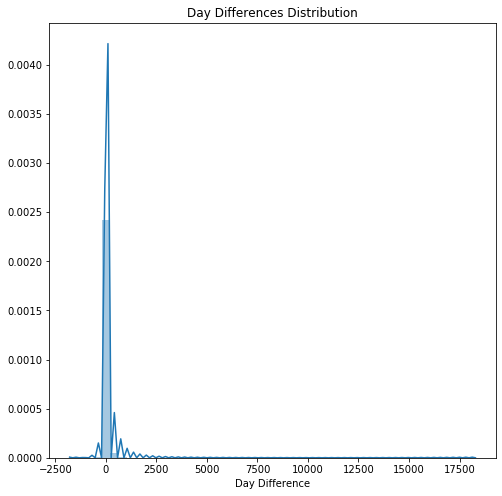

In [20]:
import seaborn as sns
plt.figure(figsize = (8,8))
sns.distplot(tsa['Day Difference'].dropna())
plt.title('Day Differences Distribution')

Text(0.5, 1.0, 'Day Differences Distribution less than 0')

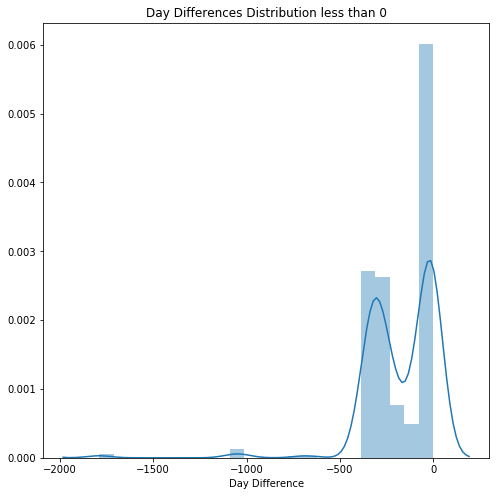

In [21]:
plt.figure(figsize = (8,8))
day_less = tsa[(tsa['Day Difference'] < 0)]
sns.distplot(day_less['Day Difference'].dropna())
plt.title('Day Differences Distribution less than 0')

Text(0.5, 1.0, 'Day Differences Distribution over than 1000')

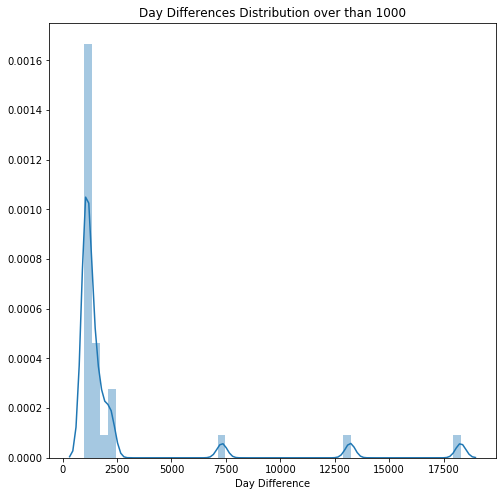

In [22]:
plt.figure(figsize = (8,8))
day_more = tsa[(tsa['Day Difference'] > 1000)]
sns.distplot(day_more['Day Difference'].dropna())
plt.title('Day Differences Distribution over than 1000')

## Question

Why do you think there is day that way more than thousand days differences, and why some day differences are less than 0? (claim was made before the incident is like someone predicting a future after all).

Answer

thousand days can be means long administration/legal process between claim and recorded date. or no one claim it for certain period of time. 

the record may be backdated, due to handling of recurring item. close value adjustment for missing item due to error handling, the claim airport is for transit for the missing item. or error in input due to human nature

In [23]:
def remove_sign(cols):
    cols = str(cols)
    if cols != 'nan':
        cols = cols.replace('$', '')
        cols = cols.replace(';', '')
        return cols
    else:
        return cols

tsa['Claim Amount'] = tsa['Claim Amount'].apply(remove_sign).astype('float64')
tsa['Close Amount'] = tsa['Close Amount'].apply(remove_sign).astype('float64')

C:\Users\Fikriem\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Fikriem\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [24]:
tsa['Amount Difference'] = tsa['Claim Amount'] - tsa['Close Amount']

C:\Users\Fikriem\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [25]:
tsa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51030 entries, 0 to 51065
Data columns (total 16 columns):
Claim Number         51030 non-null object
Date Received        50960 non-null datetime64[ns]
Incident Date        50460 non-null datetime64[ns]
Airport Code         48880 non-null object
Airport Name         48880 non-null object
Airline Name         41437 non-null object
Claim Type           48999 non-null object
Claim Site           50781 non-null object
Item                 48882 non-null object
Claim Amount         46850 non-null float64
Status               47841 non-null object
Close Amount         33753 non-null float64
Disposition          32812 non-null object
Incident Time        51030 non-null object
Day Difference       50424 non-null float64
Amount Difference    33437 non-null float64
dtypes: datetime64[ns](2), float64(4), object(10)
memory usage: 6.6+ MB


In [26]:
tsa.head()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Incident Time,Day Difference,Amount Difference
0,0909816M,2002-02-07,2003-01-06,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),50.00,Approved,50.0,Approve in Full,0:00,-333.0,0.00
1,14268,2002-06-20,2002-06-16,PHX,Phoenix Sky Harbor International,NaN,Property Damage,Checkpoint,Computer - Laptop,2270.09,Canceled,NaN,NaN,0:00,4.0,NaN
2,15242,2002-07-12,2002-05-31,BWI,Baltimore/Washington Intl Thurgood Marshall,American Airlines,NaN,Other,Luggage (all types including footlockers),200.00,Denied,0.0,Deny,0:00,42.0,200.00
3,16759,2002-08-21,2002-07-12,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Passenger Property Loss,Checkpoint,Other,21.44,Approved,21.0,Approve in Full,0:00,40.0,0.44
4,17846,2002-09-09,2002-08-30,BOS,Boston (Logan) International Airport,NaN,Property Damage,Checkpoint,Luggage (all types including footlockers),1832.22,Canceled,0.0,NaN,0:00,10.0,1832.22


Text(0.5, 1.0, 'Amount Differences Distribution')

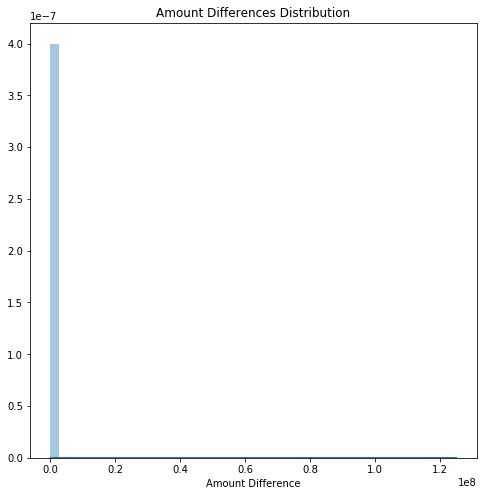

In [27]:
plt.figure(figsize = (8,8))
sns.distplot(tsa['Amount Difference'].dropna())
plt.title('Amount Differences Distribution')

In [49]:
def get_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] < fence_low) | (df_in[col_name] > fence_high)]
    return df_out
def clean_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [42]:
tsaoutlier=get_outlier(tsa,'Amount Difference')
tsaoutlier

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Incident Time,Day Difference,Amount Difference
4,17846,2002-09-09,2002-08-30,BOS,Boston (Logan) International Airport,NaN,Property Damage,Checkpoint,Luggage (all types including footlockers),1832.22,Canceled,0.00,NaN,0:00,10.0,1832.22
13,19133,2002-10-02,2002-08-22,CLE,Cleveland Hopkins International,Northwest Airlines,NaN,Other,Computer - Laptop,2000.00,Denied,0.00,Deny,0:00,41.0,2000.00
21,18614,2002-10-17,2002-09-14,MCO,Orlando International Airport,American Airlines,Property Damage,Checkpoint,Computer - Laptop,2000.00,Settled,600.00,Settle,0:00,33.0,1400.00
23,18356,2002-10-23,2002-09-18,LGA,LaGuardia,NaN,NaN,Checkpoint,Computer - Laptop,1801.99,Settled,291.67,Settle,0:00,35.0,1510.32
27,21817,2002-10-29,2002-10-05,MCO,Orlando International Airport,Delta Air Lines,NaN,Other,Other,7500.00,Denied,0.00,Deny,0:00,24.0,7500.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36208,2009123167012,2009-12-29,2009-12-18,MIA,Miami International Airport,American Airlines,Property Damage,Checked Baggage,NaN,2200.00,Denied,0.00,Deny,0:00,11.0,2200.00
36210,2009123167017,2009-12-29,2009-12-02,JFK,John F. Kennedy International,KLM Royal Dutch Airlines,Passenger Property Loss,Checked Baggage,Clothing - Shoes; belts; accessories; etc.; Co...,900.00,Denied,0.00,Deny,15:30,27.0,900.00
36213,2010010867323,2009-12-29,2009-12-21,CVG,Cincinnati/Northern Kentucky International,Delta Air Lines,Property Damage,Checkpoint,Computer - Laptop,1240.00,Denied,0.00,Deny,15:15,8.0,1240.00
36225,2009123066912,2009-12-30,2009-12-15,GSO,Piedmont Triad International Airport,Delta Air Lines,Property Damage,Checked Baggage,NaN,2300.00,Denied,0.00,Deny,0:00,15.0,2300.00


In [50]:
tsaclean=clean_outlier(tsa,'Amount Difference')

In [43]:
 tsaoutlier['Claim Amount'].describe() 

count    4.099000e+03
mean     4.168441e+04
std      1.955307e+06
min      8.510100e+02
25%      1.213880e+03
50%      1.821750e+03
75%      3.000000e+03
max      1.250000e+08
Name: Claim Amount, dtype: float64

In [44]:
tsaoutlier['Close Amount'].describe() 

count     4099.000000
mean       114.674633
std        686.848208
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      20000.000000
Name: Close Amount, dtype: float64

I assume that many of this big differences happen because these people tend to request for bigger money than what it should be. Do you agree or disagree with my assumption (With an assumption that not outlier is have normal amount differences and outlier have a really big amount differences)? why? Try to explain it with the data

In [51]:
tsaclean[['Amount Difference', 'Claim Amount', 'Close Amount']].corr()

,Amount Difference,Claim Amount,Close Amount
Amount Difference,1.000000,0.104605,-0.016311
Claim Amount,0.104605,1.000000,0.992675
Close Amount,-0.016311,0.992675,1.000000


In [ ]:
on data non outlier , between amount difference, claim, close show minimal deggree of relationship among them, hence the the outlier might have play a role

In [52]:
tsaclean[['Amount Difference', 'Claim Amount', 'Close Amount']].corr('spearman')

,Amount Difference,Claim Amount,Close Amount
Amount Difference,1.000000,0.690151,-0.478014
Claim Amount,0.690151,1.000000,0.141259
Close Amount,-0.478014,0.141259,1.000000


on data of non outlier, between amount difference and claim show positive degree of relationship, while amount difference and close amount show negative degree of relationship(inverted as one goes up the other goes down).

In [47]:
tsaoutlier[['Amount Difference', 'Claim Amount', 'Close Amount']].corr()

,Amount Difference,Claim Amount,Close Amount
Amount Difference,1.000000,1.000000,-0.002329
Claim Amount,1.000000,1.000000,-0.001978
Close Amount,-0.002329,-0.001978,1.000000


on data of outlier, between amount difference and claim show positive degree of relationship, while amount difference and close amount show negative near zero degree of relationship which can be mean between both data they have no relation at all

In [48]:
tsa[['Amount Difference', 'Claim Amount', 'Close Amount']].corr('spearman')

,Amount Difference,Claim Amount,Close Amount
Amount Difference,1.000000,0.787804,-0.512667
Claim Amount,0.787804,1.000000,-0.036283
Close Amount,-0.512667,-0.036283,1.000000


on data of outlier, between amount difference and claim show positive degree of relationship, while amount difference and close amount show negative degree of relationship(inverted as one goes up the other goes down). but correlation value is better if compare to the same test on the data of outlier. hence as the conclusion, the amount difference of outlier show greater amount compare to the non outlier data. the reason might be due to sense that outlier have greater difference between the subtracted variables.

In [53]:
tsa.head()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Incident Time,Day Difference,Amount Difference
0,0909816M,2002-02-07,2003-01-06,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),50.00,Approved,50.0,Approve in Full,0:00,-333.0,0.00
1,14268,2002-06-20,2002-06-16,PHX,Phoenix Sky Harbor International,NaN,Property Damage,Checkpoint,Computer - Laptop,2270.09,Canceled,NaN,NaN,0:00,4.0,NaN
2,15242,2002-07-12,2002-05-31,BWI,Baltimore/Washington Intl Thurgood Marshall,American Airlines,NaN,Other,Luggage (all types including footlockers),200.00,Denied,0.0,Deny,0:00,42.0,200.00
3,16759,2002-08-21,2002-07-12,BWI,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Passenger Property Loss,Checkpoint,Other,21.44,Approved,21.0,Approve in Full,0:00,40.0,0.44
4,17846,2002-09-09,2002-08-30,BOS,Boston (Logan) International Airport,NaN,Property Damage,Checkpoint,Luggage (all types including footlockers),1832.22,Canceled,0.0,NaN,0:00,10.0,1832.22


is there Any relationship between the Airport and/or the Airline with the number of the claim that happen and the Claim Type? Also why is there a NaN in the Claim Type columns

In [96]:
a=tsa.groupby(['Airport Name', 'Claim Type']).count()
a

In [105]:
a.isna().sum()

Claim Number         0
Date Received        0
Incident Date        0
Airport Code         0
Airline Name         0
Claim Site           0
Item                 0
Claim Amount         0
Status               0
Close Amount         0
Disposition          0
Incident Time        0
Day Difference       0
Amount Difference    0
dtype: int64

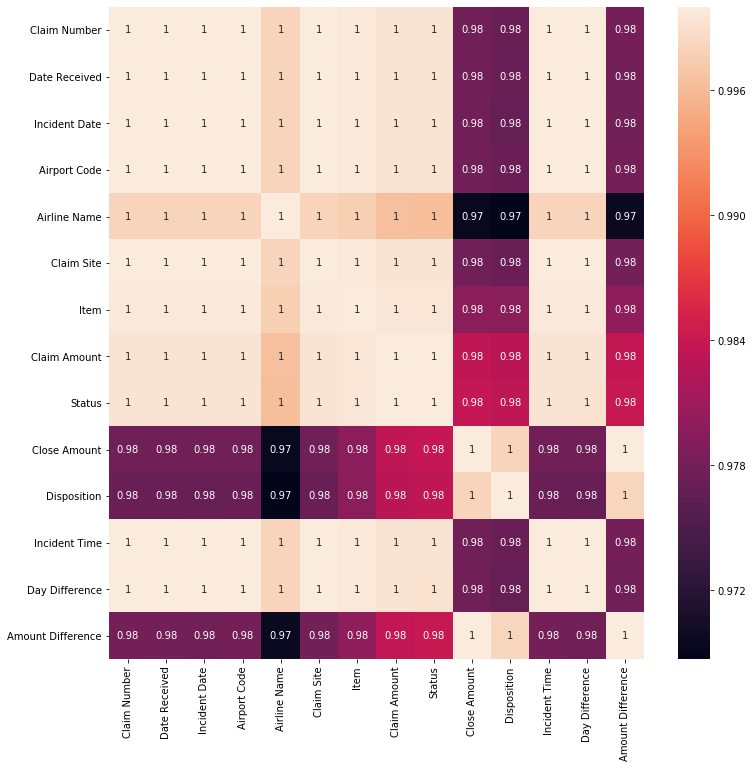

In [98]:
plt.figure(figsize = (12,12))
vis1=sns.heatmap(a.corr(),annot=True)

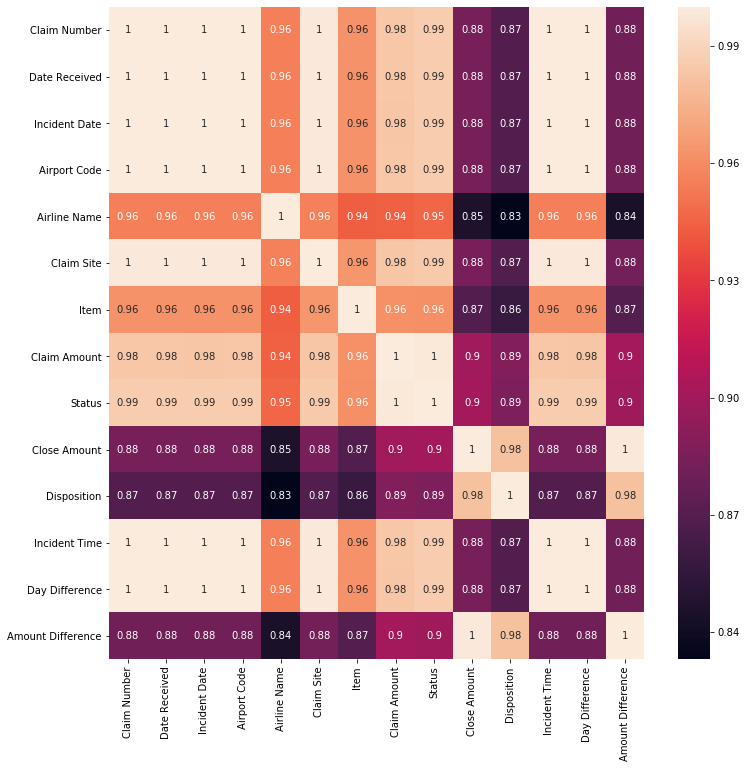

In [100]:
plt.figure(figsize = (12,12))
vis1=sns.heatmap(a.corr(method='spearman'),annot=True)

In [102]:
b=tsa.groupby(['Airline Name', 'Claim Type']).count()
b

Claim Number  Date Received  \
Airline Name           Claim Type                                             
ATA Aerocondor         Employee Loss (MPCECA)              1              1   
                       Passenger Property Loss            86             86   
                       Property Damage                    22             22   
Aer Lingus             Passenger Property Loss            16             16   
                       Personal Injury                     1              1   
...                                                      ...            ...   
Westjet Airlines Ltd   Property Damage                    13             13   
Westjet Airlines Ltd   Passenger Property Loss            24             24   
                       Property Damage                    26             26   
XL Airways             Passenger Property Loss             1              1   
Xtra Airways           Passenger Property Loss             1              1   

                                                Incident Date  Airport Code  \
Airline Name           Claim Type                                             
ATA Aerocondor         Employee Loss (MPCECA)               1             1   
                       Passenger Property Loss             86            86   
                       Property Damage                     22            22   
Aer Lingus             Passenger Property Loss             16            15   
                       Personal Injury                      1             1   
...                                                       ...           ...   
Westjet Airlines Ltd   Property Damage                     13            13   
Westjet Airlines Ltd   Passenger Property Loss             24            24   
                       Property Damage                     26            26   
XL Airways             Passenger Property Loss              1             1   
Xtra Airways           Passenger Property Loss              1             1   

                                                Airport Name  Claim Site  \
Airline Name           Claim Type                                          
ATA Aerocondor         Employee Loss (MPCECA)              1           1   
                       Passenger Property Loss            86          85   
                       Property Damage                    22          21   
Aer Lingus             Passenger Property Loss            15          16   
                       Personal Injury                     1           1   
...                                                      ...         ...   
Westjet Airlines Ltd   Property Damage                    13          13   
Westjet Airlines Ltd   Passenger Property Loss            24          24   
                       Property Damage                    26          26   
XL Airways             Passenger Property Loss             1           1   
Xtra Airways           Passenger Property Loss             1           1   

                                                Item  Claim Amount  Status  \
Airline Name           Claim Type                                            
ATA Aerocondor         Employee Loss (MPCECA)      1             1       1   
                       Passenger Property Loss    85            85      86   
                       Property Damage            22            21      22   
Aer Lingus             Passenger Property Loss    16            13      13   
                       Personal Injury             1             1       1   
...                                              ...           ...     ...   
Westjet Airlines Ltd   Property Damage            11            13      13   
Westjet Airlines Ltd   Passenger Property Loss    24            22      22   
                       Property Damage            22            23      23   
XL Airways             Passenger Property Loss     1             0       0   
Xtra Airways           Passenger Property Loss     1             1 

In [106]:
b.isna().sum()

Claim Number         0
Date Received        0
Incident Date        0
Airport Code         0
Airport Name         0
Claim Site           0
Item                 0
Claim Amount         0
Status               0
Close Amount         0
Disposition          0
Incident Time        0
Day Difference       0
Amount Difference    0
dtype: int64

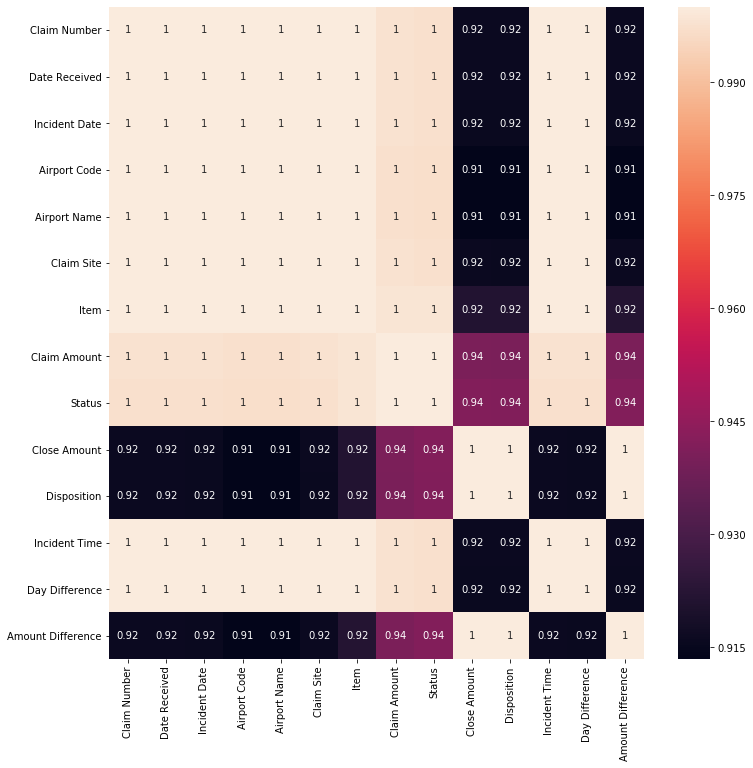

In [103]:
plt.figure(figsize = (12,12))
vis1=sns.heatmap(b.corr(),annot=True)

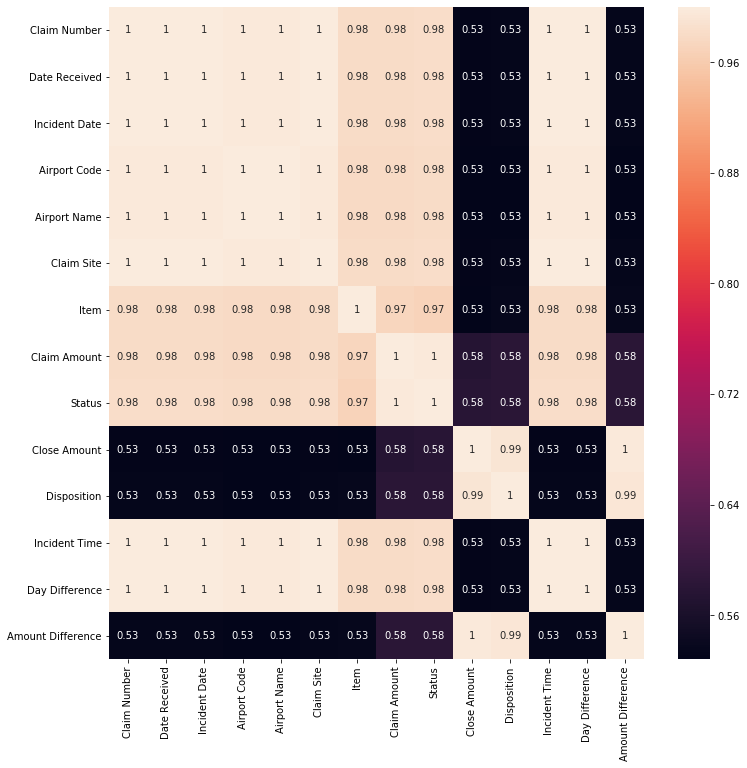

In [104]:
plt.figure(figsize = (12,12))
vis1=sns.heatmap(b.corr(method='spearman'),annot=True)

yes, as we can see from the heatmap, the relationship among the data represented by the correlation value, in this case airport or and airline have postive correlation to the occurence of claim and claim type

the missing nan in claim type, might be due to uncategorize event of claims or error in records

In [109]:
c=tsa.groupby(['Status', 'Disposition']).count()
c

Claim Number  \
Status                                             Disposition                     
Approved                                           Approve in Full          8718   
Canceled                                           Approve in Full             1   
                                                   Deny                        2   
                                                   Settle                      2   
Denied                                             Deny                    17102   
In litigation                                      Approve in Full             1   
                                                   Deny                       15   
In review                                          Deny                        1   
Insufficient; one of the following items requir... Approve in Full             1   
                                                   Deny                        4   
Settled                                            Settle                   6965   

                                                                    Date Received  \
Status                                             Disposition                      
Approved                                           Approve in Full           8708   
Canceled                                           Approve in Full              1   
                                                   Deny                         2   
                                                   Settle                       2   
Denied                                             Deny                     17093   
In litigation                                      Approve in Full              1   
                                                   Deny                        15   
In review                                          Deny                         1   
Insufficient; one of the following items requir... Approve in Full              1   
                                                   Deny                         4   
Settled                                            Settle                    6950   

                                                                    Incident Date  \
Status                                             Disposition                      
Approved                                           Approve in Full           8649   
Canceled                                           Approve in Full              1   
                                                   Deny                         2   
                                                   Settle                       2   
Denied                                             Deny                     17019   
In litigation                                      Approve in Full              1   
                                                   Deny                        15   
In review                                          Deny                         1   
Insufficient; one of the following items requir... Approve in Full              1   
                                                   Deny                         3   
Settled                                            Settle                    6910   

                                                                    Airport Code  \
Status                                             Disposition                     
Approved                                           Approve in Full          8410   
Canceled                                           Approve in Full             1   
                                                   Deny                        2   
                                                   Settle                      2   
Denied                                             Deny                    16782   
In litigation                                      Approve in Full             1   
                                                   Deny                       15   
In revi

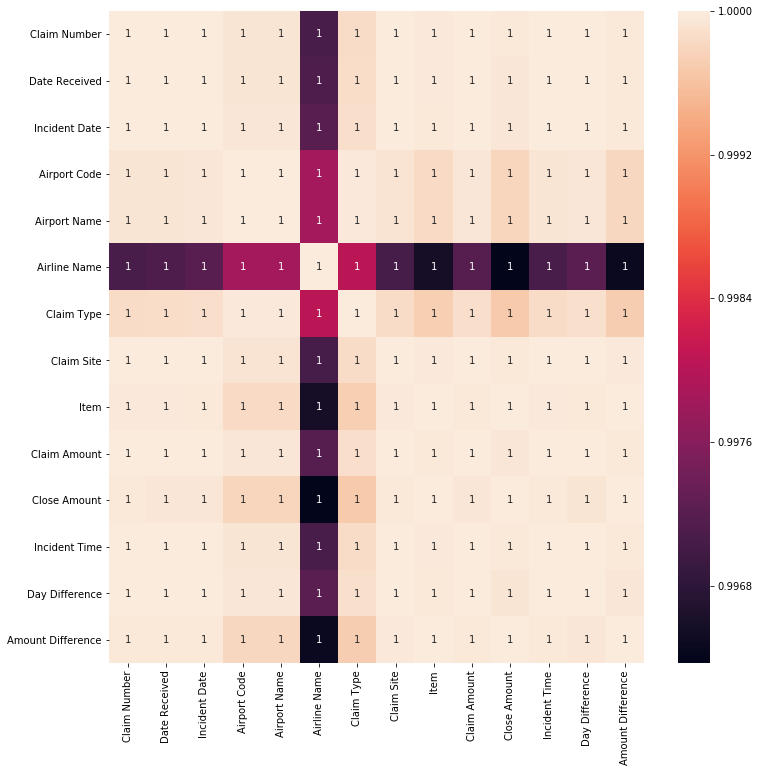

In [112]:
plt.figure(figsize = (12,12))
vis1=sns.heatmap(c.corr(),annot=True)

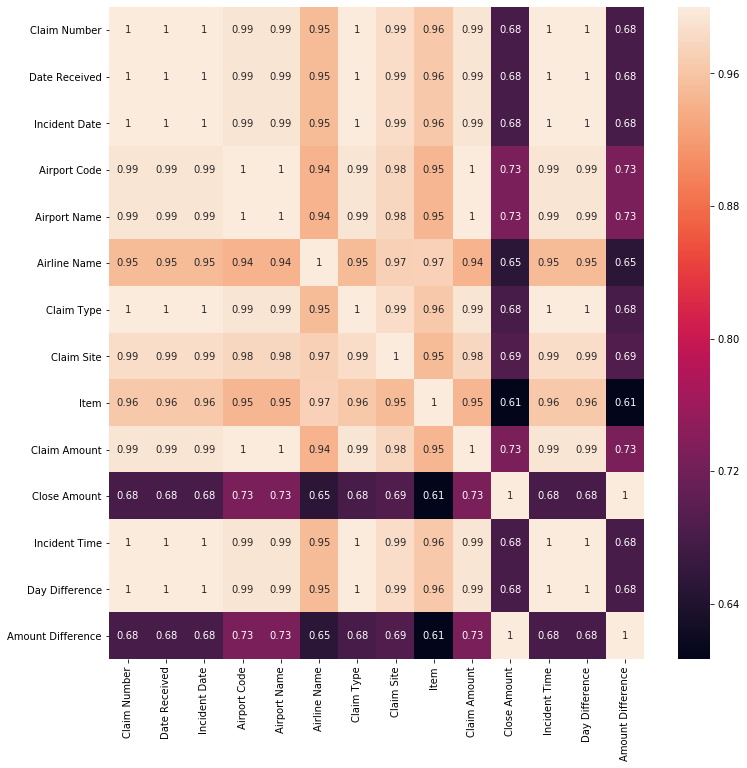

In [113]:
plt.figure(figsize = (12,12))
vis1=sns.heatmap(c.corr(method='spearman'),annot=True)

If you realize, there is many different classes in the Status and Disposition column. What pattern you could find in these 2 columns because of this classes variation? is there any relation with the other columns?

these status and disposition column can be classified under ordinal type of data, which can be represent as state from (0-4), both types is a paired which indicate the event is dependent.
yes from the heatmap it can be seen that they have a positive correleation value among the column of data set.

In [115]:
tsaclean.to_csv("tsa_claims_dashboard_ujian.csv", index=False)

In [119]:
rows = np.random.choice(tsaclean.index.values, 1000)
sampled_df = tsaclean.ix[rows]

C:\Users\Fikriem\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated



In [121]:
sampled_df.to_csv("tsa_claims_dashboard_ujian.csv", index=False)

In [122]:
tsa['Claim Site'].unique()

array(['Checkpoint', 'Other', 'Checked Baggage', 'Motor Vehicle', nan,
       'Bus Station'], dtype=object)